In [93]:
# Nguyễn Hữu Thâu
# MSSV: 19146265
# Lớp chiều thứ 5, tiết 10-12

In [94]:
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [95]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/drive/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/drive/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')


Mounted at /content/drive
Found 116 images belonging to 7 classes.
Found 121 images belonging to 7 classes.


In [96]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))

model.add(Dense(7,activation='Softmax'))
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(train,
                  steps_per_epoch=len(train),
                  batch_size = 32,
                  epochs=10,
                  validation_data=test,
                  validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/10
4/4 [==============================] - 79s 25s/step - loss: 3.8552 - accuracy: 0.1983 - val_loss: 1.9647 - val_accuracy: 0.1405
Epoch 2/10
4/4 [==============================] - 4s 1s/step - loss: 1.8006 - accuracy: 0.2414 - val_loss: 2.0008 - val_accuracy: 0.1736
Epoch 3/10
4/4 [==============================] - 4s 1s/step - loss: 1.4089 - accuracy: 0.5172 - val_loss: 2.0045 - val_accuracy: 0.2231
Epoch 4/10
4/4 [==============================] - 4s 1s/step - loss: 1.1717 - accuracy: 0.6897 - val_loss: 2.2902 - val_accuracy: 0.2893
Epoch 5/10
4/4 [==============================] - 4s 1s/step - loss: 0.6317 - accuracy: 0.7845 - val_loss: 2.6083 - val_accuracy: 0.2314
Epoch 6/10
4/4 [==============================] - 4s 1s/step - loss: 0.3428 - accuracy: 0.9052 - val_loss: 2.6424 - val_accuracy: 0.1488
Epoch 7/10
4/4 [==============================] - 4s 1s/step - loss: 0.1327 - accuracy: 0.9828 - val_loss: 3.1699 - val_accuracy: 0.2562
Epoch 8/10
4/4 [=======================

In [99]:
model.save('CNN_Money.h5')

Sai số kiểm tra là:  5.163694381713867
Độ chính xác kiểm tra là:  0.27272728085517883


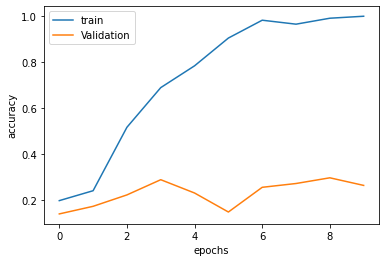

In [101]:
score = model.evaluate(test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [102]:
from keras.models import load_model
CNN_Money=load_model('CNN_Money.h5')

In [103]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from google.colab import files 
uploadfile=files.upload()


Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg


In [104]:
classes = ['LÀ 100K','LÀ 5K','LÀ 200K','LÀ 20K','LÀ 500K','LÀ 50K','LÀ 10K']

17241
LÀ 5K


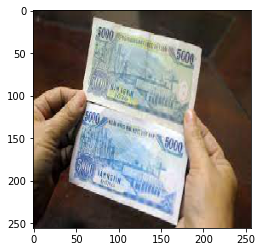

In [105]:
img = load_img("1.jpg",target_size = (256,256))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
traicay=np.argmax(model.predict(img),axis=1)
print(np.argmax(img))
if traicay==0:
  print(classes[0])
else: print(classes[1])